In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [553]:
# open csv file and load the data into pandas dataframe
appl_df = pd.read_csv('../data/raw/loan.csv')
appl_df.info()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [554]:
appl_df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [555]:
appl_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e+00,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,39.303090,7.024194e+00,35.782223,5.002082e-01,3.67

In [556]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [557]:
appl_df.count(axis=0, numeric_only=False)

id                                                  0
member_id                                           0
loan_amnt                                     2260668
funded_amnt                                   2260668
funded_amnt_inv                               2260668
term                                          2260668
int_rate                                      2260668
installment                                   2260668
grade                                         2260668
sub_grade                                     2260668
emp_title                                     2093699
emp_length                                    2113761
home_ownership                                2260668
annual_inc                                    2260664
verification_status                           2260668
issue_d                                       2260668
loan_status                                   2260668
pymnt_plan                                    2260668
url                         

In [558]:
appl_df.drop('member_id', axis=1, inplace=True)
appl_df.drop('id', axis=1, inplace=True)

In [559]:
appl_df.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [560]:
appl_df.shape

(2260668, 143)

In [561]:
df_cleanAppl = appl_df[(appl_df.loan_status == 'Fully Paid') | (appl_df.loan_status == 'Charged Off')]

In [562]:
df_cleanAppl.loan_status.value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [563]:
df_cleanAppl.shape

(1303607, 143)

In [564]:
df_cleanAppl.loan_status.value_counts(normalize=True) #About 80% are ‘Fully Paid’ and 20% are ‘Charged Off’So our sample is biased in this case

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

In [565]:
df_cleanAppl.isnull().any().value_counts() #103 COLUMNS HAVE MISSING VALUES

True     103
False     40
dtype: int64

In [566]:
print(df_cleanAppl.isnull().count())

loan_amnt                                     1303607
funded_amnt                                   1303607
funded_amnt_inv                               1303607
term                                          1303607
int_rate                                      1303607
installment                                   1303607
grade                                         1303607
sub_grade                                     1303607
emp_title                                     1303607
emp_length                                    1303607
home_ownership                                1303607
annual_inc                                    1303607
verification_status                           1303607
issue_d                                       1303607
loan_status                                   1303607
pymnt_plan                                    1303607
url                                           1303607
desc                                          1303607
purpose                     

In [567]:
print(df_cleanAppl.count())

loan_amnt                                     1303607
funded_amnt                                   1303607
funded_amnt_inv                               1303607
term                                          1303607
int_rate                                      1303607
installment                                   1303607
grade                                         1303607
sub_grade                                     1303607
emp_title                                     1221028
emp_length                                    1228153
home_ownership                                1303607
annual_inc                                    1303607
verification_status                           1303607
issue_d                                       1303607
loan_status                                   1303607
pymnt_plan                                    1303607
url                                                 0
desc                                           123327
purpose                     

In [568]:
print(len(df_cleanAppl))

1303607


In [569]:
total_num = df_cleanAppl.isnull().sum().sort_values(ascending=False)
#perc = df_cleanAppl.isnull().sum()/df_cleanAppl.isnull().count() *100
perc = df_cleanAppl.isnull().sum()/len(df_cleanAppl) *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
df_miss = pd.concat([total_num, perc1], axis=1, keys =["Total Missing Values", "Percentage %"], sort=True).sort_values(by =["Percentage %"], ascending = False)
df_miss.reset_index(inplace=True)

In [570]:
df_miss

,index,Total Missing Values,Percentage %
0,url,1303607,100.00
1,next_pymnt_d,1303607,100.00
2,orig_projected_additional_accrued_interest,1300174,99.74
3,deferral_term,1298272,99.59
4,hardship_last_payment_amount,1298272,99.59
5,hardship_payoff_balance_amount,1298272,99.59
6,hardship_end_date,1298272,99.59
7,hardship_dpd,1298272,99.59
8,hardship_amount,1298272,99.59
9,hardship_reason,1298272,99.59


In [571]:
df_miss[df_miss['Percentage %']>80].count()

index                   38
Total Missing Values    38
Percentage %            38
dtype: int64

In [572]:
df_miss.count()

index                   143
Total Missing Values    143
Percentage %            143
dtype: int64

In [573]:
# drop all those features that has more than 80% missing values
df_NewAppl = df_cleanAppl.drop(df_miss[df_miss["Percentage %"]>80]["index"], axis = 1)

In [574]:
df_NewAppl.shape

(1303607, 105)

In [575]:
df_miss[df_miss["Percentage %"]>80]["index"] # features that were dropped

0                                            url
1                                   next_pymnt_d
2     orig_projected_additional_accrued_interest
3                                  deferral_term
4                   hardship_last_payment_amount
5                 hardship_payoff_balance_amount
6                              hardship_end_date
7                                   hardship_dpd
8                                hardship_amount
9                                hardship_reason
10                           hardship_start_date
11                               hardship_status
12                                 hardship_type
13                          hardship_loan_status
14                               hardship_length
15                       payment_plan_start_date
16           sec_app_mths_since_last_major_derog
17                            sec_app_revol_util
18                         sec_app_num_rev_accts
19              sec_app_chargeoff_within_12_mths
20                  

In [576]:
keep_list = ['addr_state','annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code', 'annual_inc_norm', 'target']
drop_list = [col for col in df_NewAppl.columns if col not in keep_list]
print(drop_list) 

['funded_amnt', 'funded_amnt_inv', 'issue_d', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq',

In [577]:
df_NewAppl.drop(labels=drop_list, axis=1, inplace=True)

In [578]:
df_NewAppl.shape

(1303607, 27)

In [579]:
sorted(df_NewAppl.columns)

['addr_state',
 'annual_inc',
 'application_type',
 'dti',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'grade',
 'home_ownership',
 'initial_list_status',
 'installment',
 'int_rate',
 'loan_amnt',
 'loan_status',
 'mort_acc',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'sub_grade',
 'term',
 'title',
 'total_acc',
 'verification_status',
 'zip_code']

In [580]:
#Zip code is in the format-891xx    900xx    etc. We have clean that.
df_NewAppl.zip_code = df_NewAppl.zip_code.str.replace("xx","") 

In [581]:
#Next is formatting the dates- for e.g. Oct-2013 to 2015-10-01  format
#df_NewAppl.issue_d = pd.to_datetime(df_NewAppl.issue_d,infer_datetime_format=True)
df_NewAppl['earliest_cr_line'] = pd.to_datetime(df_NewAppl['earliest_cr_line'],infer_datetime_format=True)

Next is cleaning up the employment length feature as follows-
The values are -
10+ years
 < 1 year
 2 years
 3 years etc
We will make it as 0/1/2/3/...10 etc

In [582]:
#Next is cleaning up the employment length feature as follows- The values are - 10+ years < 1 year 2 years 3 years etc We will make it as 0/1/2/3/...10 etc

df_NewAppl['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)
df_NewAppl['emp_length'].replace('< 1 year', '0 years', inplace=True)

def emp_length_to_int(str_val):
    if pd.isnull(str_val):
        return str_val
    else:
        return np.int8(str_val.split()[0])
df_NewAppl['emp_length'] = df_NewAppl['emp_length'].apply(emp_length_to_int)

In [583]:
#Next we will figure out the outliers with z-score. The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.
#These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
#z = np.abs(stats.zscore(df_NewAppl))
#threshold = 3
#print(np.where(z > 3))
#df_NewApplReduced = df_NewAppl[(z < 3).all(axis=1)]

#Next we will figure out the outliers with The interquartile range (IQR), also called the midspread or middle 50%
#It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
#IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Q1 = df_NewAppl.quantile(0.25)
Q3 = df_NewAppl.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt               12000.00
int_rate                    6.24
installment               331.63
emp_length                  8.00
annual_inc              44160.00
dti                        12.25
open_acc                    6.00
pub_rec                     0.00
revol_bal               13796.00
revol_util                 37.20
total_acc                  16.00
mort_acc                    3.00
pub_rec_bankruptcies        0.00
dtype: float64


In [584]:
##Num_list = ['loan_amnt', 'int_rate', 'installment', 'emp_length','annual_inc', 'dti','open_acc','pub_rec','revol_bal', 'revol_util', 'total_acc','mort_acc','pub_rec_bankruptcies', ]
##df_NewApplNum = df_NewAppl[Num_list]


In [585]:
df_NewApplReduced = df_NewAppl[~((df_NewApplNum < (Q1 - 1.5 * IQR)) |(df_NewApplNum > (Q3 + 1.5 * IQR))).any(axis=1)]


In [586]:
print(df_NewAppl.shape)
print(df_NewApplReduced.shape)


(1303607, 27)
(888553, 27)


In [588]:
df_NewAppl = df_NewApplReduced

In [589]:
#Next we will move on to EDA with individual features

Next, We will inspect each feature individually.
We will perform the univariate and bivariate analysis using the folloiwng steps-
    Summary statistics
    Plot individually
    Plot against our target variable- loan_status
    Modify the feature to make it ready for modelling, if necessary

	For individual summary statistics we will use 
        .describe()
        .sample(5)
        .nunique()
     
    Finally we will plot the feature against our target feature loan_status to see if and how both are related


In [590]:
def plot_var(col_name, full_name, continuous):
    """
    plot a variable with and without loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name- for display purposes
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(df_NewAppl.loc[df_NewAppl[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df_NewAppl[col_name], order=sorted(df_NewAppl[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=df_NewAppl, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = df_NewAppl.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

    
def print_stats(col_name, group_by=False):
    """
    print the general statistics of the passed column
    """
    print('-'*60, '\n Individual Summary Statistics for', col_name, '\n', '-'*60)
    print('Describe \n',df_NewAppl[col_name].describe(), '\n', '-'*20)
    print('Sample Observations \n',df_NewAppl[col_name].sample(5), '\n', '-'*20)
    print('Number of Uniques \n',df_NewAppl[col_name].nunique(), '\n', '-'*20)
    num_uniques = df_NewAppl[col_name].nunique()
    if num_uniques <10: 
        print('Unique value counts \n', df_NewAppl[col_name].value_counts(), '\n', '-'*20)
        
    if group_by:
        print('Group_by \n', df_NewAppl.groupby('loan_status')[col_name].describe(), '\n','-'*20)

1.addr_state
2.zip_code

In [591]:
print_stats('addr_state')

------------------------------------------------------------ 
 Individual Summary Statistics for addr_state 
 ------------------------------------------------------------
Describe 
 count     888553
unique        51
top           CA
freq      129241
Name: addr_state, dtype: object 
 --------------------
Sample Observations 
 1180103    AZ
1299539    LA
1270892    MA
1853271    NJ
582932     NC
Name: addr_state, dtype: object 
 --------------------
Number of Uniques 
 51 
 --------------------


In [592]:
print_stats('zip_code')


------------------------------------------------------------ 
 Individual Summary Statistics for zip_code 
 ------------------------------------------------------------
Describe 
 count     888553
unique       931
top          112
freq        9981
Name: zip_code, dtype: object 
 --------------------
Sample Observations 
 914527     117
1069888    435
1001989    800
886797     624
270359     953
Name: zip_code, dtype: object 
 --------------------
Number of Uniques 
 931 
 --------------------


This shows there are 51 unique states and 943 values for zip_code. 
These are too many values i.e. lot of different zip codes. So we will drop the zip_code column. 
Instead we will keep the state

In [593]:
df_NewAppl.drop(labels='zip_code', axis=1, inplace=True)

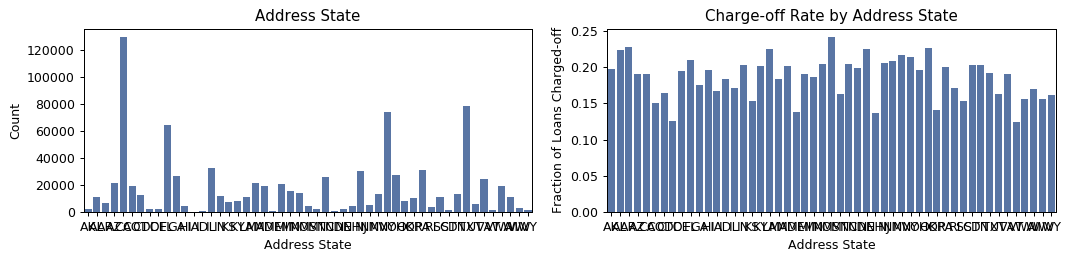

In [594]:
plot_var('addr_state', 'Address State', continuous=False)

In [595]:
#there are 51 unique values for state and the bar chart for charge-offs by state does not show any prominent trend. All the state have more or less similar charge-off rates, so we will drop this feature
df_NewAppl.drop(labels='addr_state', axis=1, inplace=True)


3. annual_inc

The summary stats show annual income values range from 0 to 10,999,200 with a median of 65,000. Since the values vary so much we will take a log transform of the feature. We will create a new feature called 'annual_inc_log' and store these values there and then drop the feature annual_inc. 

From the plot it appears that individuals who paid off the loans have slightly higher annual income.
13.lOan _title

In [596]:
df_NewAppl['annual_inc'].describe()

count    888553.000000
mean      65335.405348
std       28820.618072
min           0.000000
25%       44000.000000
50%       60000.000000
75%       82000.000000
max      156186.000000
Name: annual_inc, dtype: float64

In [598]:
from sklearn.preprocessing import minmax_scale
# mix-max scale the data between 0 and 1
df_NewAppl['annual_inc_norm'] = minmax_scale(df_NewAppl['annual_inc'])

In [599]:
print_stats('annual_inc_norm', True)

------------------------------------------------------------ 
 Individual Summary Statistics for annual_inc_norm 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean          0.418318
std           0.184528
min           0.000000
25%           0.281715
50%           0.384157
75%           0.525015
max           1.000000
Name: annual_inc_norm, dtype: float64 
 --------------------
Sample Observations 
 1525829    0.480197
1142216    0.921978
605102     0.288118
1050626    0.320131
969235     0.192079
Name: annual_inc_norm, dtype: float64 
 --------------------
Number of Uniques 
 46363 
 --------------------
Group_by 
                 count      mean       std  min       25%       50%       75%       max
loan_status                                                                           
Charged Off  170996.0  0.393275  0.176147  0.0  0.262508  0.358547  0.484592  1.000000
Fully Paid   717557.0  0.424286  0.185972  0.0  0.288118  0.3841

In [600]:
print_stats('annual_inc', True)

------------------------------------------------------------ 
 Individual Summary Statistics for annual_inc 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean      65335.405348
std       28820.618072
min           0.000000
25%       44000.000000
50%       60000.000000
75%       82000.000000
max      156186.000000
Name: annual_inc, dtype: float64 
 --------------------
Sample Observations 
 1892969    25308.0
2053008    85000.0
1703580    96000.0
1718256    54430.0
1294044    45000.0
Name: annual_inc, dtype: float64 
 --------------------
Number of Uniques 
 46363 
 --------------------
Group_by 
                 count          mean           std  min      25%      50%      75%       max
loan_status                                                                                
Charged Off  170996.0  61424.073248  27511.753867  0.0  41000.0  56000.0  75686.5  156186.0
Fully Paid   717557.0  66267.487599  29046.257243  0.0  45000.0  6000

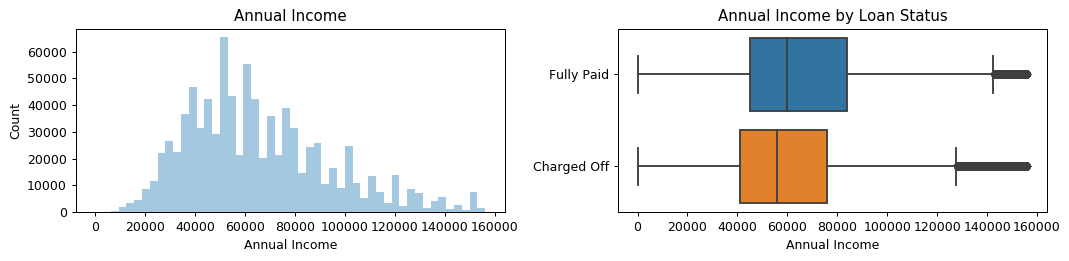

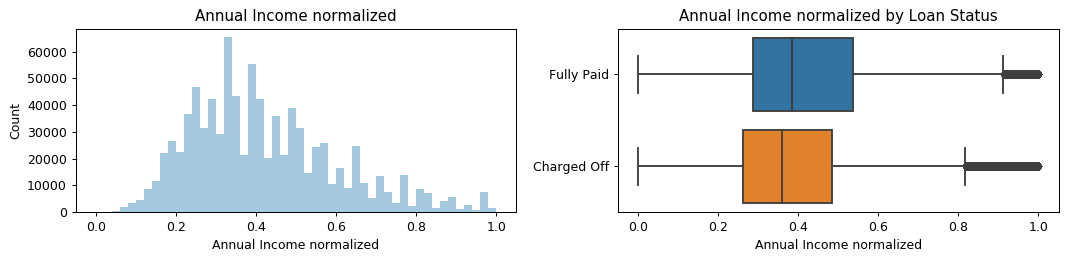

In [602]:
#lets compare and chaeck if both ditributions are same after normalization
plot_var('annual_inc', 'Annual Income', continuous=True)
plot_var('annual_inc_norm', 'Annual Income normalized', continuous=True)

#yes! they are same. So hence forth we will use annual_inc_norm

4. loan_amnt




------------------------------------------------------------ 
 Individual Summary Statistics for loan_amnt 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean      13211.045824
std        7589.800367
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18000.000000
max       38000.000000
Name: loan_amnt, dtype: float64 
 --------------------
Sample Observations 
 1332596    25450
795975     12000
1016445    20000
2128894    18000
1208666     4200
Name: loan_amnt, dtype: int64 
 --------------------
Number of Uniques 
 1431 
 --------------------
Group_by 
                 count          mean          std    min     25%      50%      75%      max
loan_status                                                                               
Charged Off  170996.0  14281.453806  7807.601512  900.0  8000.0  12950.0  20000.0  38000.0
Fully Paid   717557.0  12955.964369  7514.511223  500.0  7000.0  11900.0  18000.0  38000

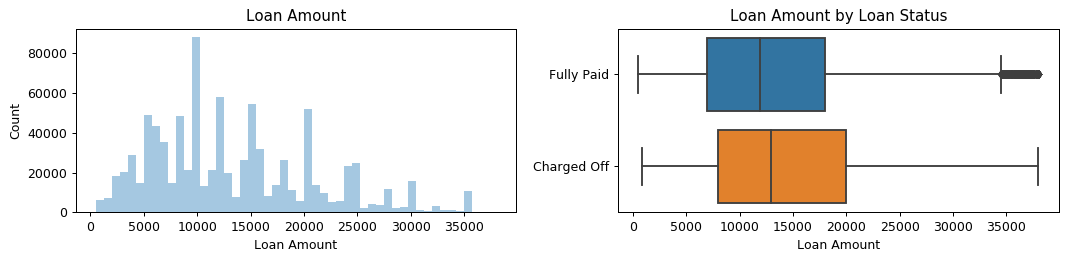

In [603]:
print_stats('loan_amnt', True)
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [604]:
#After plotting we see charged off loans have higher loan amount

5. term

In [605]:
print_stats('term')



------------------------------------------------------------ 
 Individual Summary Statistics for term 
 ------------------------------------------------------------
Describe 
 count         888553
unique             2
top        36 months
freq          683990
Name: term, dtype: object 
 --------------------
Sample Observations 
 1642897     60 months
1037845     36 months
2071734     60 months
785057      36 months
1336785     36 months
Name: term, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
  36 months    683990
 60 months    204563
Name: term, dtype: int64 
 --------------------


In [606]:
#Term has values ‘36 months’ or ‘60 months’. We will convert it into integer as follows
df_NewAppl['term'] = df_NewAppl['term'].apply(lambda s: np.int8(s.split()[0]))

In [607]:
df_NewAppl['term'].value_counts(normalize=True) #SHows about 76% of loans have 3 year period and rest are 5 year loans

36    0.76978
60    0.23022
Name: term, dtype: float64

In [608]:
df_NewAppl.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#If we focus only on charged off loans, 5 year loans are almost TWICE as likely to go BAD as 3 year loans!!!

term
36    0.155806
60    0.314945
Name: loan_status, dtype: float64

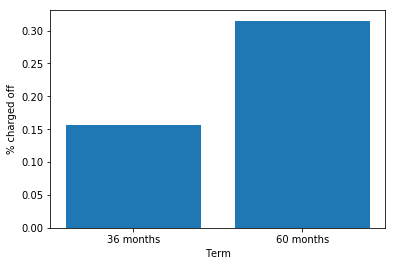

In [609]:
plt.bar(['36 months', '60 months'], height= df_NewAppl.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']) 
plt.xlabel('Term')
plt.ylabel('% charged off')
plt.show()


6. Int_rate

In [610]:
print_stats('int_rate', True)


------------------------------------------------------------ 
 Individual Summary Statistics for int_rate 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean         12.900300
std           4.378491
min           5.310000
25%           9.490000
50%          12.690000
75%          15.610000
max          25.340000
Name: int_rate, dtype: float64 
 --------------------
Sample Observations 
 1806750    14.09
1961434    14.49
2159584     9.44
1234276    13.33
1002403     9.99
Name: int_rate, dtype: float64 
 --------------------
Number of Uniques 
 594 
 --------------------
Group_by 
                 count       mean       std   min    25%    50%    75%    max
loan_status                                                                 
Charged Off  170996.0  15.139194  4.254223  5.31  12.12  14.65  18.06  25.34
Fully Paid   717557.0  12.366764  4.236468  5.31   9.16  11.99  14.99  25.34 
 --------------------


Shows int_rate ranges from 5 to 30%!!!

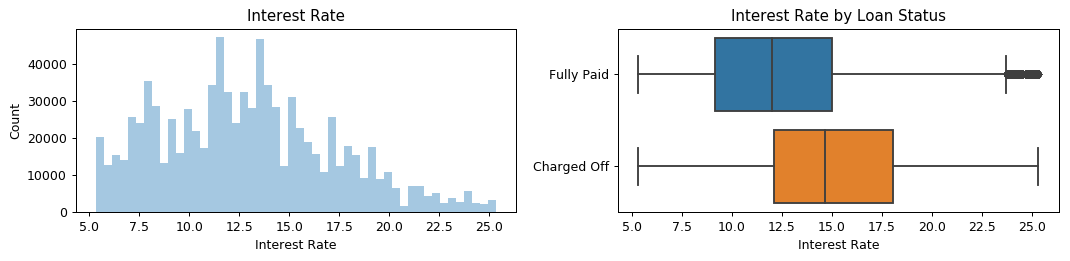

In [611]:
plot_var('int_rate', 'Interest Rate', continuous=True)

Shows charged off loans have much HIGHER interest rate!!

Next let's compare the summary statistics by loan status:

In [612]:
df_NewAppl.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170996.0,15.139194,4.254223,5.31,12.12,14.65,18.06,25.34
Fully Paid,717557.0,12.366764,4.236468,5.31,9.16,11.99,14.99,25.34


7. Installment

In [613]:
print_stats('installment')

------------------------------------------------------------ 
 Individual Summary Statistics for installment 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean        398.371542
std         216.407369
min          14.010000
25%         237.520000
50%         355.300000
75%         527.710000
max        1077.890000
Name: installment, dtype: float64 
 --------------------
Sample Observations 
 2125428    131.93
1921638    191.28
1220668    165.58
1431726    368.08
1758595    581.09
Name: installment, dtype: float64 
 --------------------
Number of Uniques 
 69342 
 --------------------


In [614]:
#Installments range from $4.93 to $1,719, with a median of $375

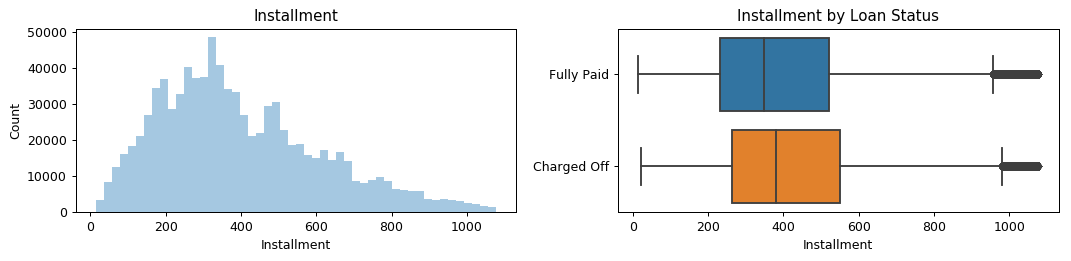

In [615]:
plot_var('installment', 'Installment', continuous=True)

Charged-off loans tend to have higher installments. Let's compare the summary statistics by loan status:

In [616]:
df_NewAppl.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,170996.0,420.750440,215.421860,21.62,263.99,379.28,550.68,1077.67
Fully Paid,717557.0,393.038584,216.300353,14.01,230.74,348.18,521.03,1077.89


8. grade
9. sub_grade

In [617]:
print(sorted(df_NewAppl['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [618]:
print(sorted(df_NewAppl['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [619]:
#the grade is implied by the subgrade, so let's drop the grade column.
df_NewAppl.drop('grade', axis=1, inplace=True)

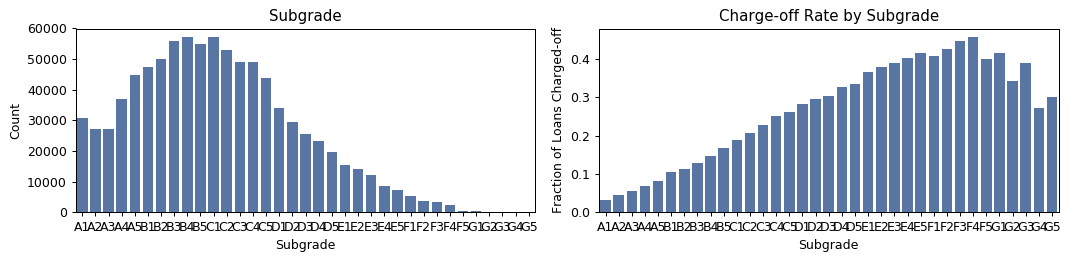

In [620]:
plot_var('sub_grade', 'Subgrade', continuous=False)

There's a clear trend of higher probability of charge-off as the subgrade gets worse!

10. emp_title

In [621]:
print_stats('emp_title')

------------------------------------------------------------ 
 Individual Summary Statistics for emp_title 
 ------------------------------------------------------------
Describe 
 count      835115
unique     281839
top       Teacher
freq        14898
Name: emp_title, dtype: object 
 --------------------
Sample Observations 
 1765722                     Verenium
1117096                Sales Manager
1826885                Soboba Casino
821774                      Musician
586344     Administrative assistant 
Name: emp_title, dtype: object 
 --------------------
Number of Uniques 
 281839 
 --------------------


In [622]:
#There are too many unique values of emp_title to be useful. So we will drop this feature
df_NewAppl.drop(labels='emp_title', axis=1, inplace=True)

11. emp_length

In [623]:
print_stats('emp_length')
df_NewAppl['emp_length'].value_counts(dropna=False).sort_index()

------------------------------------------------------------ 
 Individual Summary Statistics for emp_length 
 ------------------------------------------------------------
Describe 
 count    839903.000000
mean          5.794185
std           3.687045
min           0.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64 
 --------------------
Sample Observations 
 1166983    10.0
1523047     5.0
1011035    10.0
2009604     8.0
1453136     1.0
Name: emp_length, dtype: float64 
 --------------------
Number of Uniques 
 11 
 --------------------


0.0      75306
1.0      62282
2.0      84558
3.0      74010
4.0      55154
5.0      57332
6.0      42697
7.0      40413
8.0      40368
9.0      33998
10.0    273785
NaN      48650
Name: emp_length, dtype: int64

Note there are 75454 loans with missing value for the length of employment.


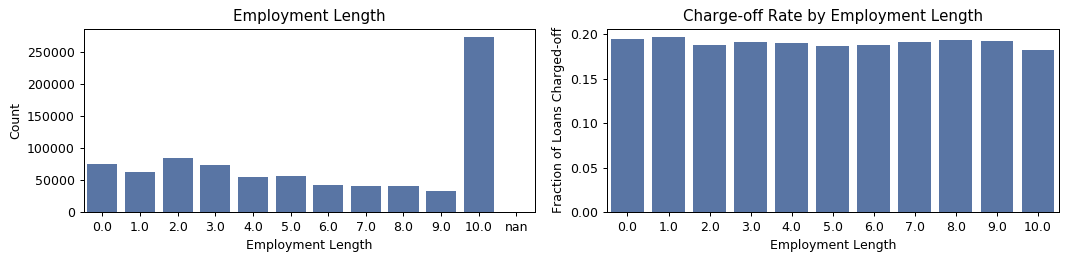

In [624]:
plot_var('emp_length', 'Employment Length', continuous=False)

THere doesn't seem to be significant effect of employment length on loan status
As the plot shows loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.

12. home_ownership

In [625]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    411309
RENT        381745
OWN          95156
ANY            173
OTHER          129
NONE            41
Name: home_ownership, dtype: int64

Let's combine the category ANY and NONO into OTHER

In [626]:
df_NewAppl['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [627]:
df_NewAppl['home_ownership'].value_counts(dropna=False)

MORTGAGE    411309
RENT        381745
OWN          95156
OTHER          343
Name: home_ownership, dtype: int64

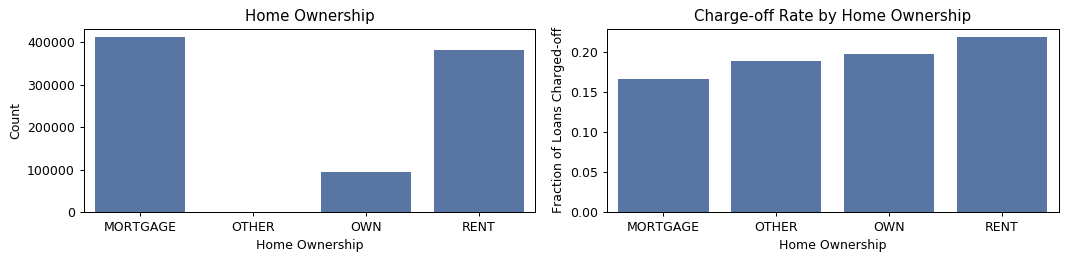

In [628]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appears to be significant differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [629]:

df_NewAppl.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
#.plot(kind='bar', color='red')


home_ownership
MORTGAGE    0.166556
OTHER       0.189504
OWN         0.198495
RENT        0.218829
Name: loan_status, dtype: float64

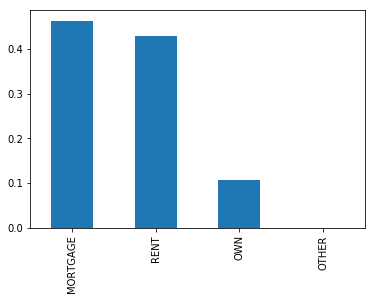

In [630]:
df_NewAppl['home_ownership'].value_counts(dropna=False, normalize = True).plot(kind='bar')

13. application_type
Tells whether the loan application is individual or joint application

From our plot and summary stats we see that - Joint loans are more likely to be charged off than individual loans

In [631]:
print_stats('application_type', True)


print(df_NewAppl.groupby('application_type')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'])
#print(df_NewAppl['loan_status'== 'Charged Off'].groupby('application_type')['loan_status'].value_counts(normalize=True))


------------------------------------------------------------ 
 Individual Summary Statistics for application_type 
 ------------------------------------------------------------
Describe 
 count         888553
unique             2
top       Individual
freq          876475
Name: application_type, dtype: object 
 --------------------
Sample Observations 
 1035024    Individual
1784774    Individual
417887     Individual
1683530    Individual
2029145    Individual
Name: application_type, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 Individual    876475
Joint App      12078
Name: application_type, dtype: int64 
 --------------------
Group_by 
               count unique         top    freq
loan_status                                   
Charged Off  170996      2  Individual  168210
Fully Paid   717557      2  Individual  708265 
 --------------------
application_type
Individual    0.191916
Joint App     0.230667
Name: loan_status, d

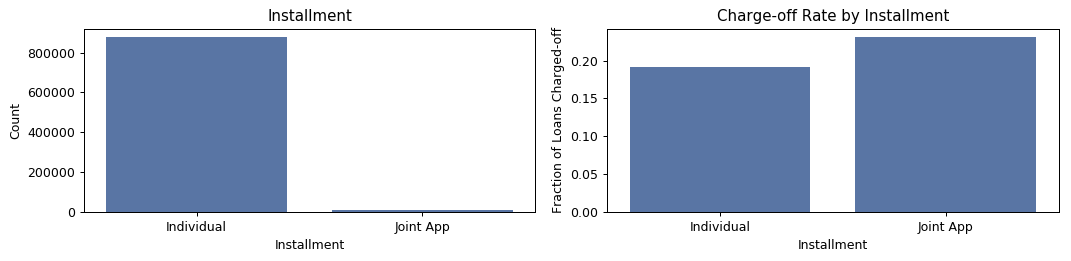

In [632]:
plot_var('application_type', 'Installment', continuous=False)

14. dti : debt to income ratio (debt excluding mortgage and current application debt)

In [633]:
print_stats('dti')

------------------------------------------------------------ 
 Individual Summary Statistics for dti 
 ------------------------------------------------------------
Describe 
 count    888341.000000
mean         18.017513
std           8.280638
min           0.000000
25%          11.840000
50%          17.560000
75%          23.830000
max          42.390000
Name: dti, dtype: float64 
 --------------------
Sample Observations 
 655936      4.57
1156021    15.83
2245275     7.48
1729298     8.98
688794     17.95
Name: dti, dtype: float64 
 --------------------
Number of Uniques 
 4222 
 --------------------


There seems to be some outliers. Since the values range from -1 to 999 with 75% values below 24. 


In [634]:
#df_NewAppl.groupby('target')['dti'].value_counts(normalize=True)
df_NewAppl.dti.nunique()

4222

In [635]:
df_NewAppl.shape

(888553, 24)

In [636]:
df_NewAppl[df_NewAppl.dti > 24].dti.count()

216807

15. initial_list_status: Initial listing status of the listing

In [637]:
print_stats('initial_list_status')

------------------------------------------------------------ 
 Individual Summary Statistics for initial_list_status 
 ------------------------------------------------------------
Describe 
 count     888553
unique         2
top            w
freq      498682
Name: initial_list_status, dtype: object 
 --------------------
Sample Observations 
 597342     w
920710     w
1188266    f
1718434    f
2005836    f
Name: initial_list_status, dtype: object 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 w    498682
f    389871
Name: initial_list_status, dtype: int64 
 --------------------


16. mort_acc: number of mortgage accounts

In [638]:
print_stats('mort_acc')

------------------------------------------------------------ 
 Individual Summary Statistics for mort_acc 
 ------------------------------------------------------------
Describe 
 count    847816.000000
mean          1.415173
std           1.727178
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           7.000000
Name: mort_acc, dtype: float64 
 --------------------
Sample Observations 
 2091980    4.0
1599672    0.0
1285391    1.0
1375351    2.0
933951     0.0
Name: mort_acc, dtype: float64 
 --------------------
Number of Uniques 
 8 
 --------------------
Unique value counts 
 0.0    383262
1.0    146693
2.0    116594
3.0     83621
4.0     56281
5.0     33534
6.0     18549
7.0      9282
Name: mort_acc, dtype: int64 
 --------------------


17. open_acc: the number of open credit lines in borrower's credit line

In [639]:
print_stats('open_acc')

------------------------------------------------------------ 
 Individual Summary Statistics for open_acc 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean         10.724468
std           4.432910
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          23.000000
Name: open_acc, dtype: float64 
 --------------------
Sample Observations 
 2037392    13.0
1789394    13.0
599636     11.0
1783452    12.0
1016981    13.0
Name: open_acc, dtype: float64 
 --------------------
Number of Uniques 
 24 
 --------------------


18. pub_rec : number of derogatory public accounts

In [640]:
print_stats('pub_rec')

------------------------------------------------------------ 
 Individual Summary Statistics for pub_rec 
 ------------------------------------------------------------
Describe 
 count    888553.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: pub_rec, dtype: float64 
 --------------------
Sample Observations 
 1827282    0.0
722143     0.0
156877     0.0
1868330    0.0
1248329    0.0
Name: pub_rec, dtype: float64 
 --------------------
Number of Uniques 
 1 
 --------------------
Unique value counts 
 0.0    888553
Name: pub_rec, dtype: int64 
 --------------------


In [641]:
#Since pub_rec is all zeros, we will drop this column
df_NewAppl.drop('pub_rec', axis=1, inplace=True)

In [642]:
#19. pub_rec_bankruptcies: number of public record bankruptcies

In [643]:
print_stats('pub_rec_bankruptcies')
print(df_NewAppl.pub_rec_bankruptcies.value_counts())
print(df_NewAppl.pub_rec_bankruptcies.value_counts(normalize=True))

------------------------------------------------------------ 
 Individual Summary Statistics for pub_rec_bankruptcies 
 ------------------------------------------------------------
Describe 
 count    887947.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: pub_rec_bankruptcies, dtype: float64 
 --------------------
Sample Observations 
 1614169    0.0
1261480    0.0
1947420    0.0
793044     0.0
1852693    0.0
Name: pub_rec_bankruptcies, dtype: float64 
 --------------------
Number of Uniques 
 1 
 --------------------
Unique value counts 
 0.0    887947
Name: pub_rec_bankruptcies, dtype: int64 
 --------------------
0.0    887947
Name: pub_rec_bankruptcies, dtype: int64
0.0    1.0
Name: pub_rec_bankruptcies, dtype: float64


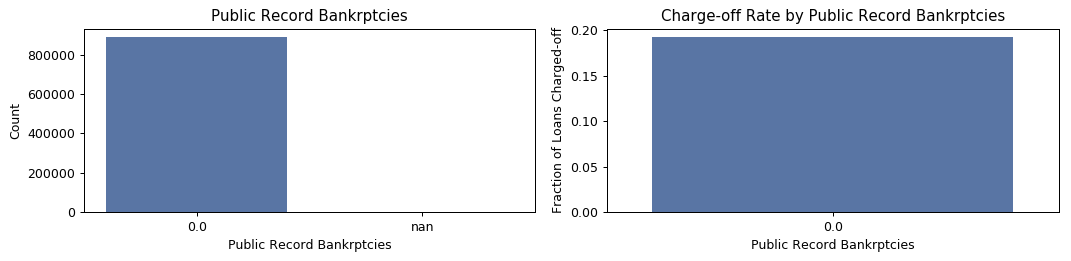

In [644]:
plot_var('pub_rec_bankruptcies', 'Public Record Bankrptcies', continuous=False)

In [645]:
#Since pub_rec_bankruptcies is all zeros, we will drop this column
df_NewAppl.drop('pub_rec_bankruptcies', axis=1, inplace=True)

20. purpose: a category provided by the borrower for the loan request

In [646]:
print_stats('purpose')
print(df_NewAppl.purpose.value_counts())

------------------------------------------------------------ 
 Individual Summary Statistics for purpose 
 ------------------------------------------------------------
Describe 
 count                 888553
unique                    14
top       debt_consolidation
freq                  515529
Name: purpose, dtype: object 
 --------------------
Sample Observations 
 2246234                   car
1769133                 other
646736     debt_consolidation
1013703           credit_card
221746     debt_consolidation
Name: purpose, dtype: object 
 --------------------
Number of Uniques 
 14 
 --------------------
debt_consolidation    515529
credit_card           198128
other                  52733
home_improvement       51528
major_purchase         20001
car                    10494
medical                10361
small_business          9244
moving                  6863
vacation                6351
house                   4363
wedding                 2036
renewable_energy         640
educat

In [647]:
#21. revol_bal: total credit revolving balance

In [648]:
print_stats('revol_bal')

------------------------------------------------------------ 
 Individual Summary Statistics for revol_bal 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean      12770.648062
std        8932.727633
min           0.000000
25%        5892.000000
50%       10763.000000
75%       17814.000000
max       40442.000000
Name: revol_bal, dtype: float64 
 --------------------
Sample Observations 
 807068     19361
2107338    10274
977912     32300
2071516     6354
2125484     1985
Name: revol_bal, dtype: int64 
 --------------------
Number of Uniques 
 40297 
 --------------------


In [649]:
#22. revol_util: revolving line utilization rate or 

In [650]:
print_stats('revol_util')

------------------------------------------------------------ 
 Individual Summary Statistics for revol_util 
 ------------------------------------------------------------
Describe 
 count    887959.000000
mean         52.285071
std          24.641468
min           0.000000
25%          33.900000
50%          52.700000
75%          71.400000
max         126.400000
Name: revol_util, dtype: float64 
 --------------------
Sample Observations 
 1557616    40.7
773697     41.5
1779866    40.5
910366     30.4
551031     25.8
Name: revol_util, dtype: float64 
 --------------------
Number of Uniques 
 1272 
 --------------------


In [651]:
#23. title

In [652]:
print_stats('title')

------------------------------------------------------------ 
 Individual Summary Statistics for title 
 ------------------------------------------------------------
Describe 
 count                 878511
unique                 51948
top       Debt consolidation
freq                  420893
Name: title, dtype: object 
 --------------------
Sample Observations 
 933854                       Other
1569062           Medical expenses
1093573                      Other
1075617         Debt consolidation
1028106    Credit card refinancing
Name: title, dtype: object 
 --------------------
Number of Uniques 
 51948 
 --------------------


In [653]:
#There are too many unique values of title to be useful. So we will drop this feature
df_NewAppl.drop(labels='title', axis=1, inplace=True)

In [654]:
#earliest_cr_line
print_stats('earliest_cr_line')

------------------------------------------------------------ 
 Individual Summary Statistics for earliest_cr_line 
 ------------------------------------------------------------
Describe 
 count                  888553
unique                    716
top       2004-09-01 00:00:00
freq                     6434
first     1934-04-01 00:00:00
last      2015-09-01 00:00:00
Name: earliest_cr_line, dtype: object 
 --------------------
Sample Observations 
 1110362   1987-09-01
2056887   2002-02-01
2198179   2009-11-01
1116474   2003-10-01
1524011   2001-11-01
Name: earliest_cr_line, dtype: datetime64[ns] 
 --------------------
Number of Uniques 
 716 
 --------------------


In [655]:
#Since there are too many uniques values of earliest_cr_line, we will drop this column
df_NewAppl.drop(labels='earliest_cr_line', axis=1, inplace=True)

In [656]:
#24. total_acc: the total number of credit lines currently in the borrower's credit line

In [657]:
print_stats('total_acc')

------------------------------------------------------------ 
 Individual Summary Statistics for total_acc 
 ------------------------------------------------------------
Describe 
 count    888553.000000
mean         22.919669
std          10.276434
min           2.000000
25%          15.000000
50%          22.000000
75%          29.000000
max          56.000000
Name: total_acc, dtype: float64 
 --------------------
Sample Observations 
 1839952    15.0
1821637    28.0
2258216    15.0
1605522    12.0
2127086    30.0
Name: total_acc, dtype: float64 
 --------------------
Number of Uniques 
 55 
 --------------------


In [658]:
#25. verification_status

In [659]:
print_stats('verification_status')

------------------------------------------------------------ 
 Individual Summary Statistics for verification_status 
 ------------------------------------------------------------
Describe 
 count              888553
unique                  3
top       Source Verified
freq               333405
Name: verification_status, dtype: object 
 --------------------
Sample Observations 
 1140133    Source Verified
1928571       Not Verified
678062        Not Verified
1079907           Verified
1871776       Not Verified
Name: verification_status, dtype: object 
 --------------------
Number of Uniques 
 3 
 --------------------
Unique value counts 
 Source Verified    333405
Not Verified       298469
Verified           256679
Name: verification_status, dtype: int64 
 --------------------


In [660]:
print(df_NewAppl.dtypes)
print(df_NewAppl.shape)
print(df_NewAppl.isnull().sum())


loan_amnt                int64
term                     int64
int_rate               float64
installment            float64
sub_grade               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
open_acc               float64
revol_bal                int64
revol_util             float64
total_acc              float64
initial_list_status     object
application_type        object
mort_acc               float64
annual_inc_norm        float64
dtype: object
(888553, 20)
loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
emp_length             48650
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                      212
open_

Missing Values
----------------

There are 888553 observations out of which 800 or so have missing values. In effect there are 0.0009% rows have missing values. This is a very miniscuse percent so we could safely drop the rows with missing values without having any impact on our future models.


In [661]:
df_NewAppl.dropna(inplace=True)

In [662]:
print(df_NewAppl.dtypes)
print(df_NewAppl.shape)
print(df_NewAppl.isnull().sum())

loan_amnt                int64
term                     int64
int_rate               float64
installment            float64
sub_grade               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
open_acc               float64
revol_bal                int64
revol_util             float64
total_acc              float64
initial_list_status     object
application_type        object
mort_acc               float64
annual_inc_norm        float64
dtype: object
(799780, 20)
loan_amnt              0
term                   0
int_rate               0
installment            0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
open_acc               0
revol_bal              0
rev

Inferential Statistics
-----------------------

Next we will perform a statistical analysis to establish whether term has a significant impact on the charge backs aka our target variable loan_status

1. Test
We will use Z statistic test for this problem
Explaination- We will take random sample from the data set with sample size =100 (50+50). Our target variable has 2 values. So this is a binomial distribution. However with n=100, CLT applies. The sampling distribution will follow normal distribution.

2. Hypothesis

Null Hypothesis H0: There are no differences in both sample proportions i.e. term has no impact on the charge back

Alternate hypothesis H1: Both sample proportions are different i.e. term has impact on the charge backs

3. Significance
Confidence Level : 95%

4. Interpretation
Reject the null hypothesis if p value< a 

Note: the test is appropriate because the sampling method was simple random sampling, the samples were independent, each population was at least 10 times larger than its sample, and each sample included at least 10 successes and 10 failures.

In [663]:
print_stats('term')

------------------------------------------------------------ 
 Individual Summary Statistics for term 
 ------------------------------------------------------------
Describe 
 count    799780.000000
mean         41.614874
std          10.160231
min          36.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: term, dtype: float64 
 --------------------
Sample Observations 
 821368     60
1977073    60
1753963    36
1309531    36
1333457    60
Name: term, dtype: int64 
 --------------------
Number of Uniques 
 2 
 --------------------
Unique value counts 
 36    612669
60    187111
Name: term, dtype: int64 
 --------------------


In [664]:
df1 = df_NewAppl[df_NewAppl.term == 36][['loan_status', 'term']].sample(100)
df2 = df_NewAppl[df_NewAppl.term==60][['loan_status', 'term']].sample(100)
frames = [df1, df2]
df_sample = pd.concat(frames)
df_sample.shape

(200, 2)

In [665]:
df_sample.describe()

,term
count,200.000000
mean,48.000000
std,12.030113
min,36.000000
25%,36.000000
50%,48.000000
75%,60.000000
max,60.000000


In [666]:
df_sample.term.value_counts()

60    100
36    100
Name: term, dtype: int64

In [667]:
df_sample.sample(5)

,loan_status,term
545101,Fully Paid,36
1304494,Charged Off,60
131972,Fully Paid,60
1787464,Charged Off,60
1148672,Fully Paid,60


In [668]:
df_sample['charge_off'] = df_sample['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)


In [669]:
#next we will find the sample proportions
# number of charge backs for 36 and 60 months term
total_36CB = sum(df_sample[df_sample.term==36].charge_off)
total_60CB = sum(df_sample[df_sample.term==60].charge_off)

total_60 = df_sample[df_sample.term==60].term.count()
total_36 = df_sample[df_sample.term==36].term.count()


In [670]:
print(total_36CB)
print(total_60CB)
print(total_60)
print(total_36)


12
36
100
100


In [671]:
p1 = total_36CB/total_36
p2 = total_60CB/total_60
n1 = total_36
n2 = total_60
confidence_level = 95
p = (p1 * n1 + p2 * n2) / (n1 + n2)
SE = np.sqrt(p * ( 1 - p ) * ( (1/n1) + (1/n2) ))
z = (p1 - p2) / SE
a = 1 - (confidence_level / 100)
p_crit = 1 - a/2

p_val=1-stats.norm.cdf(abs(z))


p_val*=2  # two sided test

z_critical=stats.norm.ppf((1+0.95)/2)

ci_low = p1-p2-z_critical*SE
ci_high = p1-p2+z_critical*SE

moe = SE*z
print('P value is', p_val)
print('Significance level alpha is', a)
print('Confidence Interval at 95% is', ci_low, ' to ', ci_high )
print('Margin of Error is ', moe)

P value is 7.079528641296129e-05
Significance level alpha is 0.050000000000000044
Confidence Interval at 95% is -0.35837922865896776  to  -0.12162077134103225
Margin of Error is  -0.24


Interpretation:
----------------
     comparing the P-value to the significance level, we see that the P-value is less than the significance level.
     So we have reject the null hypothesis. 
    That means Both sample proportions are different i.e. 
    with 95% confidence we can say that term has significant impact on the charge backs 

Next we will perform a statistical analysis to establish whether interest_rate has a significant impact on the charge backs ie our target variable loan_status

1. Test
We will use two sample Z statistic test two sided for this problem
Explaination- We will take random sample from the data set with sample size =100 (50+50). Our target variable has 2 values. So this is a binomial distribution. However with n=100, CLT applies. The sampling distribution will follow normal distribution.

2. Hypothesis

Null Hypothesis H0: There are no differences in both sample proportions i.e. interest_rate has no impact on the charge back

Alternate hypothesis H1: Both sample proportions are different i.e. interest_rate has impact on the charge backs

3. Significance
Confidence Level : 95%

4. Interpretation
Reject the null hypothesis if p value< a 

Note: the test is appropriate because the sampling method was simple random sampling, the samples were independent, each population was at least 10 times larger than its sample, and each sample included at least 10 successes and 10 failures.

In [672]:
df1 = df_NewAppl[df_NewAppl.loan_status == 'Fully Paid'][['loan_status', 'int_rate']].sample(100)
df2 = df_NewAppl[df_NewAppl.loan_status == 'Charged Off'][['loan_status', 'int_rate']].sample(100)
frames = [df1, df2]
df_sample = pd.concat(frames)
df_sample.shape

(200, 2)

In [673]:
df_sample.describe()

,int_rate
count,200.00000
mean,13.79155
std,4.34215
min,5.32000
25%,10.93000
50%,13.52500
75%,16.35500
max,24.99000


In [674]:
df_sample.loan_status.value_counts()

Charged Off    100
Fully Paid     100
Name: loan_status, dtype: int64

In [675]:
df_sample.sample(5)

,loan_status,int_rate
1246645,Fully Paid,10.99
1205817,Fully Paid,6.24
1205171,Fully Paid,17.57
1089398,Fully Paid,9.99
1675750,Fully Paid,9.67


In [676]:
m1 = np.mean(df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'])
std1 = np.std(df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'])

m2 = np.mean(df_sample[df_sample.loan_status == 'Charged Off']['int_rate'])
std2 = np.std(df_sample[df_sample.loan_status == 'Charged Off']['int_rate'])

n1 = df_sample[df_sample.loan_status == 'Fully Paid']['int_rate'].count()
n2 = df_sample[df_sample.loan_status == 'Charged Off']['int_rate'].count()
confidence_level = 95

SE = np.sqrt( ((std1*std1)/n1) + ((std2*std2)/n2) )


z = (m1 - m2) / SE
a = 1 - (confidence_level / 100)
p_crit = 1 - a/2

p_val=1-stats.norm.cdf(abs(z))


p_val*=2  # two sided test

z_critical=stats.norm.ppf((1+0.95)/2)

ci_low = m1-m2-z_critical*SE
ci_high = m1-m2+z_critical*SE

moe = SE*z
print('P value is', p_val)
print('Significance level alpha is', a)
print('Confidence Interval at 95% is', ci_low, ' to ', ci_high )
print('Margin of Error is ', moe)

P value is 6.709077391420237e-07
Significance level alpha is 0.050000000000000044
Confidence Interval at 95% is -4.004550373231158  to  -1.7392496267688282
Margin of Error is  -2.871899999999993


Interpretation:
     comparing the P-value to the significance level, we see that the P-value is less than the significance level.
     So we have reject the null hypothesis. 
    That means Both sample means are different i.e. 
    with 95% confidence we can say that int_rate has significant impact on the charge offs 

In [677]:
df_NewAppl['target'] = df_NewAppl['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)
#df_NewAppl.drop('loan_status', axis = 1, inplace=True)

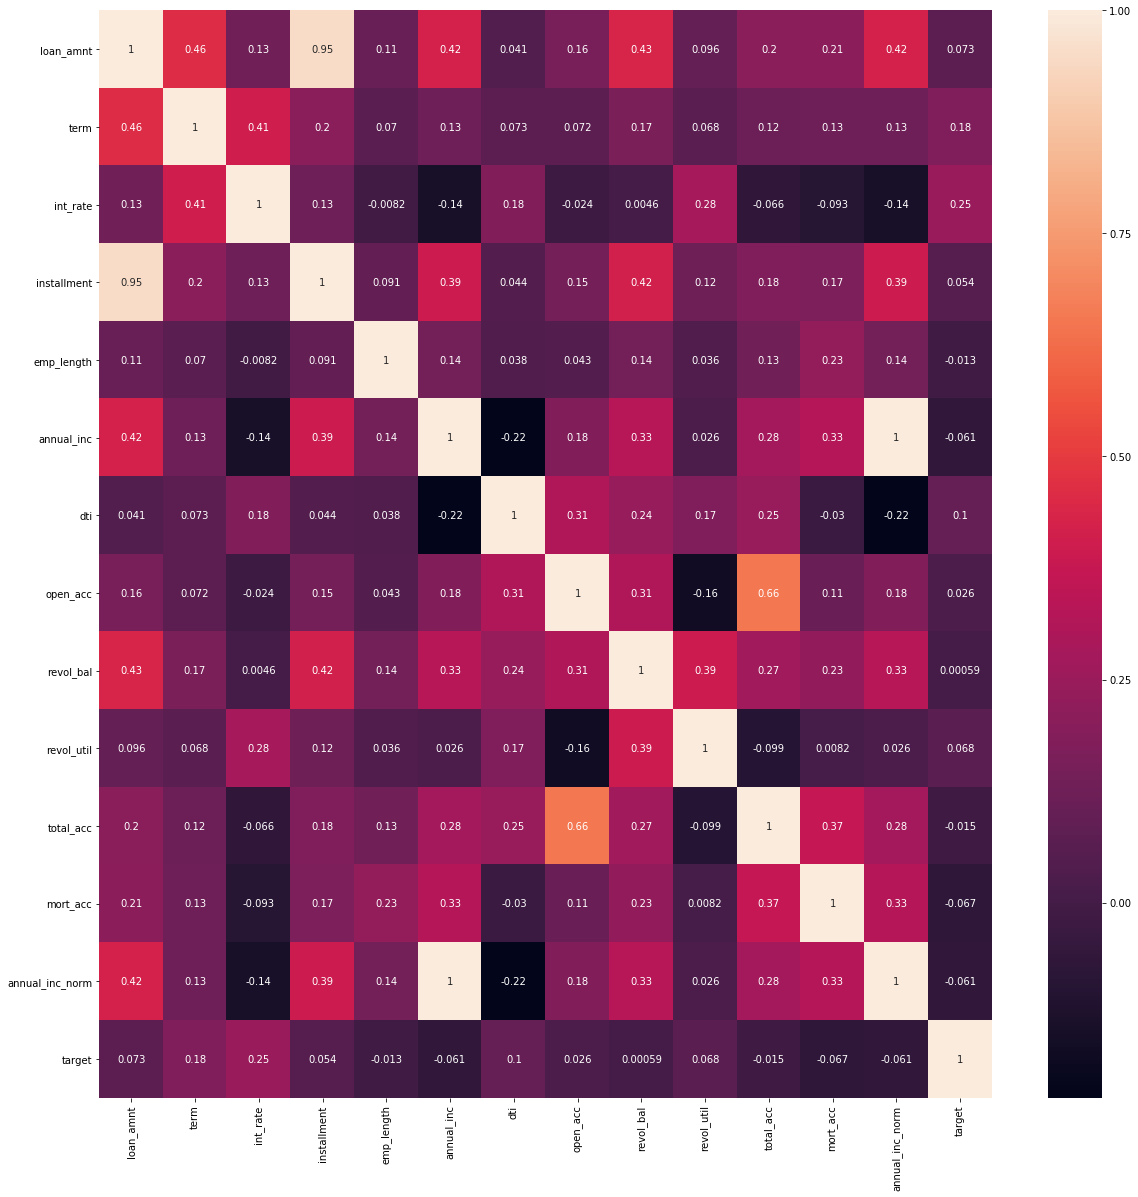

In [678]:
plt.figure(figsize=(20,20))
cor = df_NewAppl.corr()
sns.heatmap(cor, annot=True)

In [679]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

loan_amnt          0.073228
term               0.175813
int_rate           0.251829
installment        0.053809
emp_length         0.012542
annual_inc         0.060934
dti                0.101785
open_acc           0.026256
revol_bal          0.000590
revol_util         0.067885
total_acc          0.014948
mort_acc           0.066915
annual_inc_norm    0.060934
target             1.000000
Name: target, dtype: float64

In [680]:
plot_list = ['loan_amnt', 'term', 'int_rate','installment', 'dti','open_acc', 'revol_bal','revol_util','total_acc', 'mort_acc']

df_plot = pd.DataFrame()
#df_plot['charge_off'] = df_NewAppl['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)
df_plot[plot_list] = df_NewAppl[plot_list]

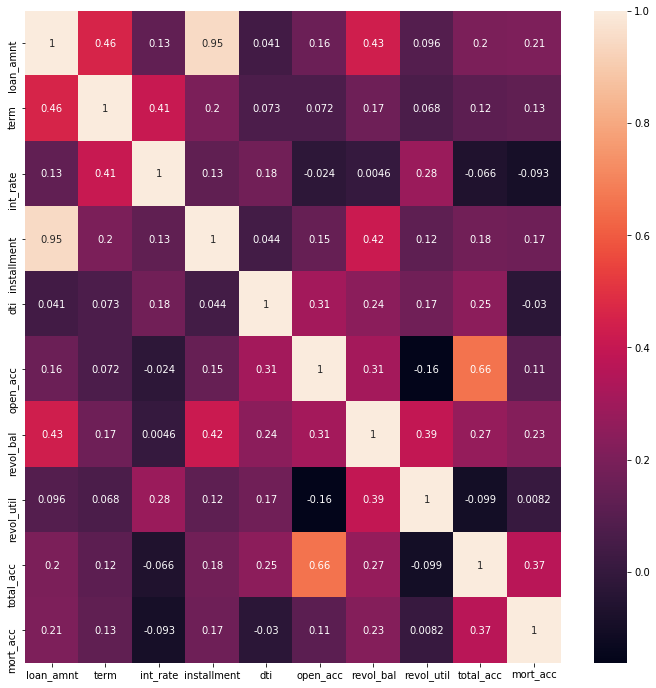

In [681]:
plt.figure(figsize=(12,12))
cor = df_plot.corr()
sns.heatmap(cor, annot=True)


ML Model


The aim is to find y , a target variable based on knowing a list of features X. We are trying to predict 'Loan Status' converted to target feature  with values 0 = 'Fully paid' and 1 = 'Charged Off'. SInce target variable takes only 2 values 0 and 1, this will be a binary classification problem.
First we will use 'Logistic Regression'

Training and Test Datasets
When fitting models, we would like to ensure two things:

- We have found the best model (in terms of model parameters).
- The model is highly likely to generalize i.e. perform well on unseen data.

First, we try a basic Logistic Regression:

- Split the data into a training and test (hold-out) set
- Train on the training set, and test for accuracy on the testing set

In [682]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.model_selection import KFold


RFE
-----

Next we will use RFE. The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

You will use RFE with the Logistic Regression classifier to select the top 3 features. 

In [683]:

feature_list = ['loan_amnt', 'term', 'int_rate','installment', 'dti','open_acc', 'revol_bal','revol_util','total_acc', 'mort_acc', 'annual_inc','annual_inc_norm' ]

X = df_NewAppl[feature_list].values
y = df_NewAppl.target

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Num Features: 4
Selected Features: [False  True  True False  True False False False False  True False False]
Feature Ranking: [6 1 1 5 1 2 8 4 3 1 7 9]


RFE chose the top 4 features as 'term','int_rate','mort_acc', 'annual_inc_norm' 

Let's first build the model with only top 4 features. Next we will build the model with all features. THen compare and see how the model performs.

In [684]:

feature_list = ['term','int_rate','mort_acc', 'annual_inc_norm' ]

X = df_NewAppl[feature_list].values
y = df_NewAppl.target

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y,random_state=5)

clf = LogisticRegression()

# Fit the model on the trainng data.
clf.fit(Xlr, ylr)

# Print the accuracy from the testing data.
y_predicted= clf.predict(Xtestlr)
print("Accuracy Score = ", accuracy_score(y_predicted, ytestlr))

# performance
print("Classification report for %s" % clf)
print(metrics.classification_report(ytestlr, y_predicted))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score =  0.808277276250969
Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    161771
           1       0.48      0.04      0.08     38174

   micro avg       0.81      0.81      0.81    199945
   macro avg       0.65      0.52      0.49    199945
weighted avg       0.75      0.81      0.74    199945



In [685]:
#Next let's build the model with all the features and compare
#this will most probably lead to over fitting

In [686]:
feature_list2 = ['loan_amnt', 'term', 'int_rate','installment', 'dti','open_acc', 'revol_bal','revol_util','total_acc', 'mort_acc', 'annual_inc','annual_inc_norm' ]

#Next let's build the model with all the features and compare

X2 = df_NewAppl[feature_list2].values
y2 = df_NewAppl.target

# Split the data into a training and test set.
Xlr2, Xtestlr2, ylr2, ytestlr2 = train_test_split(X2, y2,random_state=5)

clf2 = LogisticRegression()

# Fit the model on the trainng data.
clf.fit(Xlr2, ylr2)

# Print the accuracy from the testing data.
y_predicted2= clf.predict(Xtestlr2)
print("Accuracy Score for second model with all the features = ", accuracy_score(y_predicted2, ytestlr2))

# performance
print("Classification report for %s" % clf2)
print(metrics.classification_report(ytestlr2, y_predicted2))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score for second model with all the features =  0.8055865362974818
Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    161771
           1       0.31      0.01      0.03     38174

   micro avg       0.81      0.81      0.81    199945
   macro avg       0.56      0.50      0.46    199945
weighted avg       0.71      0.81      0.73    199945



In [687]:

#1.Use the C and train a Logistic Regression on the training data
clf = LogisticRegression(C=0.001)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
#2.Calculate the accuracy on the test data
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8093125609542624


In [688]:
#let's do K fold cross validation and find the F1 scores

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=10, scoring='f1_weighted')
#print(scores)
print("F1 score: %0.2f with 95%% Confidence Interval (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print("Classification report for %s\n" % clf)
print(metrics.classification_report(ytestlr, y_predicted))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

F1 score: 0.73 with 95% Confidence Interval (+/- 0.00)

Classification report for LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89    161771
           1       0.48      0.04      0.08     38174

   micro avg       0.81      0.81      0.81    199945
   macro avg       0.65      0.52      0.49    199945
weighted avg       0.75      0.81      0.74    199945



Logistic regression with SGD
----------------------------------
The SGDClassifier estimator in scikit-learn implements linear classifiers (SVM, logistic regression, and others) with stochastic gradient descent (SGD) training. we choose logistic regression by setting loss = 'log'

In [689]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

In [690]:
#The machine learning pipeline loss='log' for logistics model
pipeline_sgdlogreg = Pipeline([
    ('imputer', SimpleImputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [691]:
#grid of hyperparameters to search over
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}

In [692]:
#Create the search grid object


grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)


In [693]:
#Conduct the grid search and train the final model on the whole dataset

grid_sgdlogreg.fit(X, y)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   56.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=False, fill_value=None, missing_values=nan,
       strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=False, with_mean=True, with_std=True)), ('model', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0...ndom_state=1, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=True))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'model__alpha': [1e-05, 0.01, 10], 'model__penalty': ['l1', 'l2']},
       pre_dispatch=1, refit=True, return_train_score=False,
       scoring='roc_auc', verbose=1)

In [694]:
#Mean cross-validated score of the best model
grid_sgdlogreg.best_score_

0.6957945496180807

In [695]:
#Best hyperparameters
grid_sgdlogreg.best_params_

{'model__alpha': 0.01, 'model__penalty': 'l1'}